# Evaluation Metrics for Classification

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Evaluation Metrics

In [35]:
df = pd.read_csv("data.csv")

df.columns = df.columns.str.lower().str.replace(" ", "_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")
    
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == "yes").astype(int)

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [37]:
numerical = ["tenure", "monthlycharges", "totalcharges"]
categorical = list(filter(lambda x: x not in numerical, list(df_train.columns)))

In [38]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical+numerical].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
val_dict = df_val[categorical+numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.7984386089425124)

## Accuracy and Dummy Model
* Evaluate the model on different threshold
* Check the accuracy of dummy baseline

In [40]:
from sklearn.metrics import accuracy_score
from collections import Counter

In [41]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    count = Counter(churn_decision)
    score = accuracy_score(y_val, churn_decision)
    scores.append(score)
    print(score, count)
    

0.2739531582682754 Counter({np.True_: 1409})
0.5117104329311568 Counter({np.True_: 1060, np.False_: 349})
0.5975869410929737 Counter({np.True_: 913, np.False_: 496})
0.6678495386799148 Counter({np.True_: 780, np.False_: 629})
0.709013484740951 Counter({np.False_: 717, np.True_: 692})
0.7345635202271115 Counter({np.False_: 803, np.True_: 606})
0.7544357700496807 Counter({np.False_: 883, np.True_: 526})
0.7693399574166075 Counter({np.False_: 924, np.True_: 485})
0.7828246983676366 Counter({np.False_: 989, np.True_: 420})
0.7963094393186657 Counter({np.False_: 1044, np.True_: 365})
0.7984386089425124 Counter({np.False_: 1089, np.True_: 320})
0.8019872249822569 Counter({np.False_: 1142, np.True_: 267})
0.794889992902768 Counter({np.False_: 1200, np.True_: 209})
0.78708303761533 Counter({np.False_: 1253, np.True_: 156})
0.7636621717530163 Counter({np.False_: 1308, np.True_: 101})
0.7466288147622427 Counter({np.False_: 1366, np.True_: 43})
0.7352732434350603 Counter({np.False_: 1394, np.True

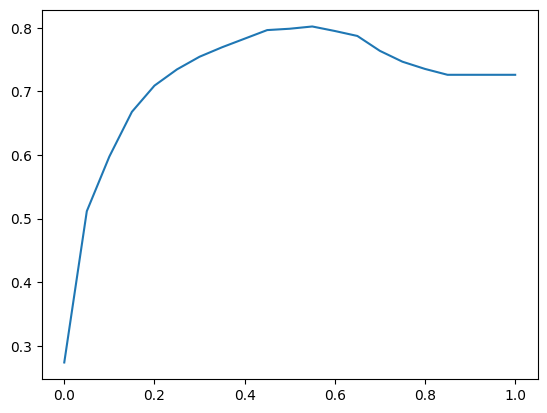

In [42]:
plt.plot(thresholds, scores)

## Confusion Table

In [43]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [44]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [59]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(np.int64(211), np.int64(914))

In [60]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn


(np.int64(109), np.int64(175))

In [61]:
confusion_matrix = np.array([[tn, fp],[fn, tp]])
confusion_matrix

array([[914, 109],
       [175, 211]])

In [62]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

## Precision and Recall

In [63]:
p = tp/(tp+fp)
p

np.float64(0.659375)

In [64]:
r = tp / (tp+fn)
r

np.float64(0.5466321243523317)

In [66]:
a = (tp+tn)/(tp+tn+fp+fn)
a

np.float64(0.7984386089425124)

## ROC Curves

**TPR and FRP**

In [67]:
tpr = tp/(tp + fn)
tpr

np.float64(0.5466321243523317)

In [68]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10654936461388075)

In [70]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(904), np.int64(1), np.int64(119)),
 (np.float64(0.02), np.int64(384), np.int64(819), np.int64(2), np.int64(204)),
 (np.float64(0.03), np.int64(383), np.int64(756), np.int64(3), np.int64(267)),
 (np.float64(0.04), np.int64(381), np.int64(711), np.int64(5), np.int64(312)),
 (np.float64(0.05), np.int64(379), np.int64(681), np.int64(7), np.int64(342)),
 (np.float64(0.06), np.int64(377), np.int64(658), np.int64(9), np.int64(365)),
 (np.float64(0.07), np.int64(372), np.int64(633), np.int64(14), np.int64(390)),
 (np.float64(0.08), np.int64(371), np.int64(601), np.int64(15), np.int64(422)),
 (np.float64(0.09), np.int64(368), np.int64(573), np.int64(18), np.int64(450)),
 (np.float64(0.1), np.int64(366), np.int64(547), np.int64(20), np.int64(476)),
 (np.float64(0.11), np.int64(365), np.int64(520), np.int64(21), np.int64(503)),
 (np.float64(0.12), np.int64(363), np.int64(501), 

In [74]:
columns = ["threshold", 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [75]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,547,20,476
20,0.2,334,358,52,665
30,0.3,283,243,103,780
40,0.4,250,170,136,853
50,0.5,211,109,175,914
60,0.6,153,56,233,967
70,0.7,77,24,309,999
80,0.8,14,1,372,1022
90,0.9,0,0,386,1023


In [76]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

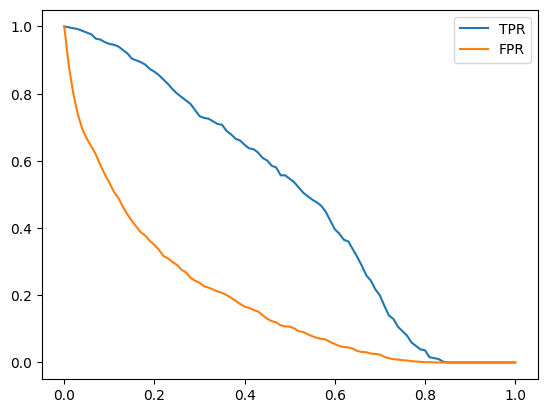

In [78]:
plt.plot(df_scores.threshold, df_scores.tpr, label="TPR")
plt.plot(df_scores.threshold, df_scores.fpr, label="FPR")
plt.legend()

**Random Mpdel**

In [91]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [92]:
((y_rand >= 0.5)==y_val).mean()

np.float64(0.5017743080198722)

In [93]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ["threshold", 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)  
    
    df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [94]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [95]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


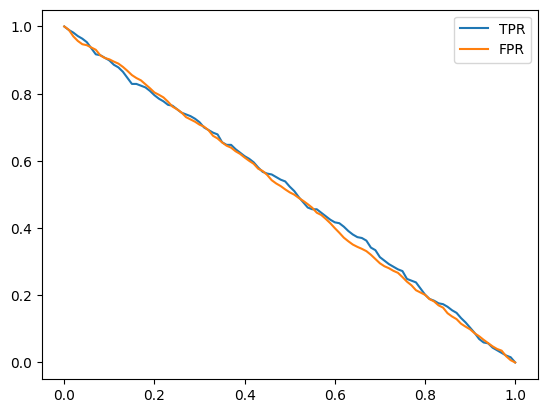

In [96]:
plt.plot(df_rand.threshold, df_rand.tpr, label="TPR")
plt.plot(df_rand.threshold, df_rand.fpr, label="FPR")
plt.legend()

**Ideal Model**

In [97]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [98]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [99]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [100]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [102]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [107]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

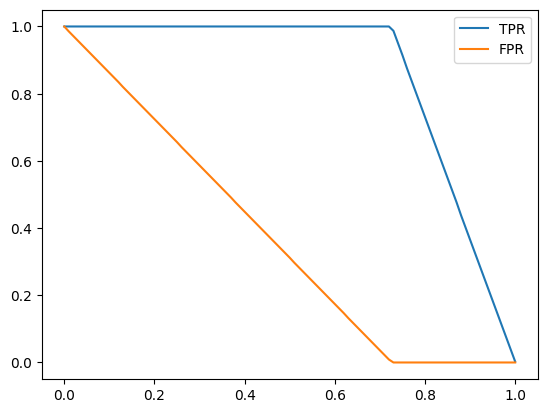

In [108]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label="TPR")
plt.plot(df_ideal.threshold, df_ideal.fpr, label="FPR")
plt.legend()

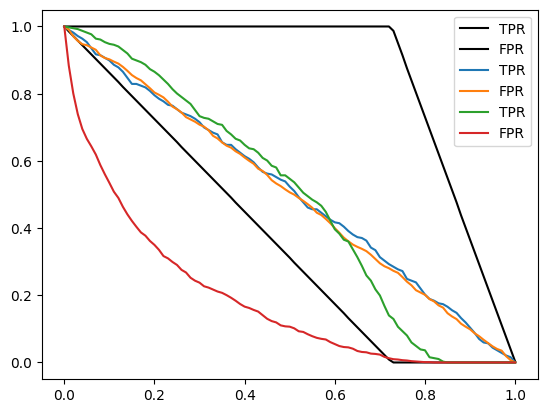

In [109]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label="TPR", color="black")
plt.plot(df_ideal.threshold, df_ideal.fpr, label="FPR", color="black")

plt.plot(df_rand.threshold, df_rand.tpr, label="TPR")
plt.plot(df_rand.threshold, df_rand.fpr, label="FPR")

plt.plot(df_scores.threshold, df_scores.tpr, label="TPR")
plt.plot(df_scores.threshold, df_scores.fpr, label="FPR")

plt.legend()

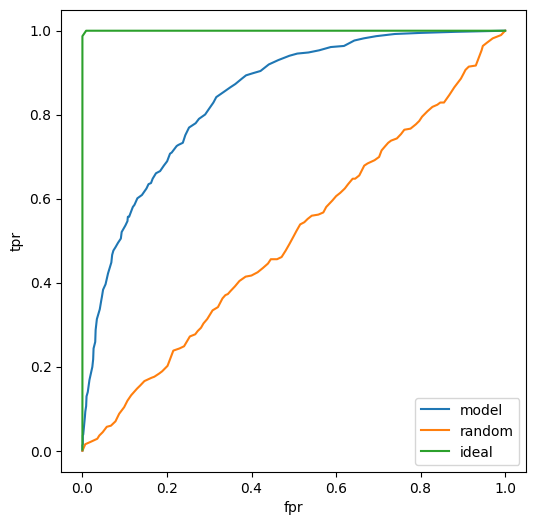

In [110]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot(df_rand.fpr, df_rand.tpr, label="random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")

plt.xlabel("fpr")
plt.ylabel("tpr")

plt.legend()

In [111]:
from sklearn.metrics import roc_curve

In [112]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

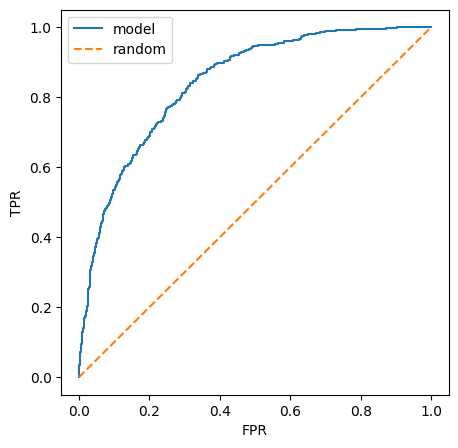

In [117]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label="model")
plt.plot([0,1], [0,1], label="random", linestyle="--")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

## Roc AUC
* Area under the ROC curve 
* implementation of AUC

In [123]:
from sklearn.metrics import auc, roc_auc_score

In [119]:
auc(fpr, tpr)

0.8422728032455594

In [120]:
auc(df_scores.fpr, df_scores.tpr)

0.8424589366842417

In [121]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [124]:
roc_auc_score(y_val, y_pred)

0.8422728032455594

In [125]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [126]:
import random

In [ ]:
n = 100000
success = 0
for i in range(n):
    pos_ind = random.randint(0, len(pos)  - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success += 1
        
success / n

0.84256

In [130]:
n = 10000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.8391)

## Cross-Validation
* Evaluation the same model on different subsets of fata
* Getting the average prediction and the spread within predictions

In [150]:
def train(X_train, y_train, C=1.0):
    dicts = X_train[categorical + numerical].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [132]:
dv, model = train(df_train, y_train)

/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
def predict(df, dv, model):
    
    dicts = df[categorical + numerical].to_dict(orient="records")
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [134]:
y_pred = (df_val, dv, model)

In [135]:
from sklearn.model_selection import KFold

In [137]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(5070, 564)

In [138]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [141]:
!uv add tqdm

Resolved 52 packages in 1m 10s                                       
⠴ Preparing packages... (0/1)                                                   
⠦ Preparing packages... (0/1)----     0 B/76.70 KiB                     
⠦ Preparing packages... (0/1)----     0 B/76.70 KiB                     
⠧ Preparing packages... (0/1)---- 16.00 KiB/76.70 KiB                   
⠧ Preparing packages... (0/1)---- 16.00 KiB/76.70 KiB                   
⠇ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠋ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠙ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠹ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠸ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠸ Preparing packages... (0/1)---- 32.00 KiB/76.70 KiB                   
⠸ Preparing packages... (0/1)---- 40.34 KiB/76.70 KiB                   
⠸ Preparing packages... (0/1)---- 43.03 KiB/76

In [145]:
from tqdm.auto import tqdm

In [151]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
        
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print("%s %.3f += %.3f"%(C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [03:56<23:39, 236.65s/it]

0.001 0.826 += 0.012


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

0.01 0.841 += 0.012


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

0.1 0.842 += 0.012


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

0.5 0.839 += 0.012


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

1 0.838 += 0.012


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

5 0.835 += 0.011


/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

10 0.832 += 0.014


In [152]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

/home/mangino/Documents/Projects/MLZoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8486748025610193

In [148]:
print("%.3 +- %3.f", np.mean(scores), np.std(score))

%.3 +- %3.f 0.8409607998912068 0.0


## Summary

In [47]:
## Summary